In [2]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------------------- -------------------- 61.4/129.1 kB 3.4 MB/s eta 0:00:01
   -------------------------------------- - 122.9/129.1 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 122.9/129.1 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 691.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from keras_tuner.tuners import RandomSearch




In [6]:
# Load the Boston Housing dataset
boston = fetch_openml(data_id=531, parser='auto')


In [9]:
# Split the data into features (X) and target (y)
X = boston.data
y = boston.target


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])
    
    return model

In [14]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    directory='my_dir',
    project_name='boston_housing'
)


In [17]:
tuner.search_space_summary()

tuner.search(X_train_scaled, y_train,
             epochs=20,
             validation_data=(X_test_scaled, y_test))

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [18]:
tuner.results_summary()

Results summary
Results in my_dir\boston_housing
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
num_layers: 3
units_0: 384
learning_rate: 0.01
units_1: 512
units_2: 224
Score: 11.437787055969238

Trial 02 summary
Hyperparameters:
num_layers: 3
units_0: 384
learning_rate: 0.01
units_1: 320
units_2: 32
Score: 11.578863143920898

Trial 00 summary
Hyperparameters:
num_layers: 1
units_0: 480
learning_rate: 0.01
Score: 11.636931419372559

Trial 04 summary
Hyperparameters:
num_layers: 3
units_0: 416
learning_rate: 0.001
units_1: 512
units_2: 288
Score: 11.744338989257812

Trial 01 summary
Hyperparameters:
num_layers: 2
units_0: 384
learning_rate: 0.01
units_1: 32
Score: 11.936443328857422

Trial 05 summary
Hyperparameters:
num_layers: 2
units_0: 288
learning_rate: 0.001
units_1: 192
units_2: 96
Score: 14.063640594482422

Trial 08 summary
Hyperparameters:
num_layers: 2
units_0: 160
learning_rate: 0.001
units_1: 160
units_2: 352
Score: 15.5

In [27]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.get_config())

Best Hyperparameters:
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_2', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}}], 'values': {'num_layers': 3, 'units_0': 384, 'learning_rate': 0.01, 'units_1': 512, 'units_2': 224}}


In [20]:
'''best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hyperparameters}")'''


Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000022D6839E380>


4/4 [==============================] - 0s 6ms/step


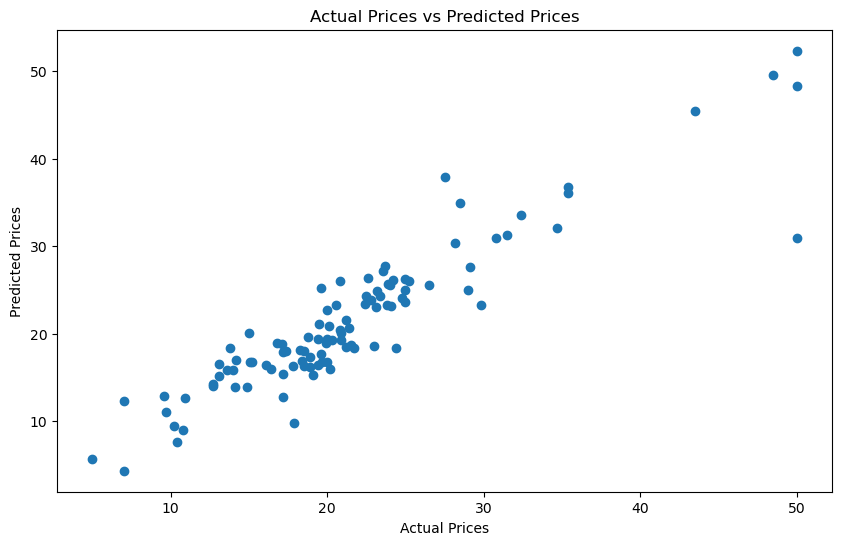

In [21]:
# Predictions
predictions = best_model.predict(X_test_scaled)

# Plot predicted vs actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [35]:
# Evaluate the model
loss = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss}')


Test Loss: [11.437787055969238, 2.324185848236084]


In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
from sklearn.metrics import mean_absolute_error


4/4 [==============================] - 0s 6ms/step
Mean Squared Error (MSE): 11.437787125179899
Mean Absolute Error (MAE): 2.324185872545429


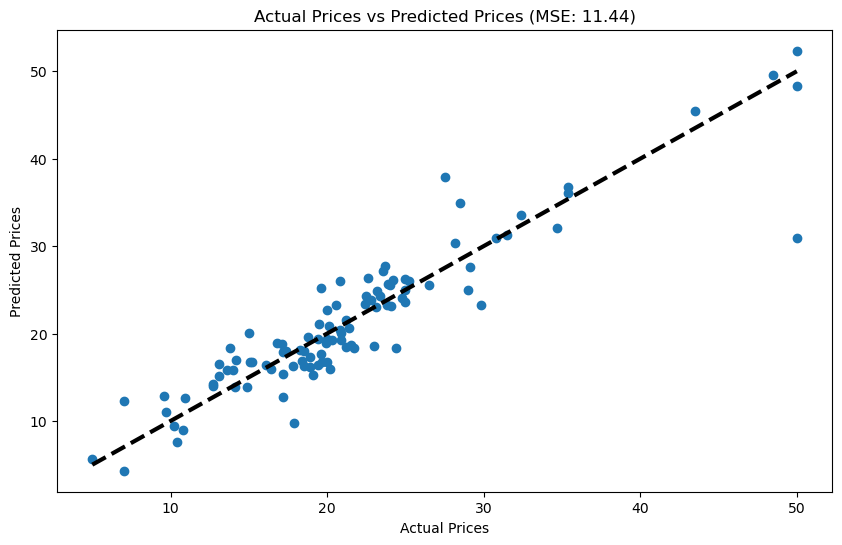

In [32]:
# Predictions
predictions = best_model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


# Plot predicted vs actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Plot line of unity
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (MSE: {:.2f})'.format(mse))
plt.show()